**Opening** a file.
**Reading** it's contents and storing it in a variable 'dataset'.


In [ ]:
file=open("Salary_dataset.csv")
dataset=file.readlines()


**Printing** the contents of 'dataset'.

In [24]:
dataset


[',YearsExperience,Salary\n',
 '0,1.2,39344\n',
 '1,1.4,46206\n',
 '2,1.6,37732\n',
 '3,2.1,43526\n',
 '4,2.3,39892\n',
 '5,3,56643\n',
 '6,3.1,60151\n',
 '7,3.3,54446\n',
 '8,3.3,64446\n',
 '9,3.8,57190\n',
 '10,4,63219\n',
 '11,4.1,55795\n',
 '12,4.1,56958\n',
 '13,4.2,57082\n',
 '14,4.6,61112\n',
 '15,5,67939\n',
 '16,5.2,66030\n',
 '17,5.4,83089\n',
 '18,6,81364\n',
 '19,6.1,93941\n',
 '20,6.9,91739\n',
 '21,7.2,98274\n',
 '22,8,101303\n',
 '23,8.3,113813\n',
 '24,8.8,109432\n',
 '25,9.1,105583\n',
 '26,9.6,116970\n',
 '27,9.7,112636\n',
 '28,10.4,122392\n',
 '29,10.6,121873\n']

Creating two lists, x and y, to store the two columns of data, while ignoring the first row.

In [26]:
x=[]
y=[]
first=False
for data in dataset:
    if first==False:
        first=True
        continue
    elements=data.split(',')
    # print(elements)
    x.append(float(elements[1]))
    y.append(float(elements[2]))
print(x)
print(y)

[1.2, 1.4, 1.6, 2.1, 2.3, 3.0, 3.1, 3.3, 3.3, 3.8, 4.0, 4.1, 4.1, 4.2, 4.6, 5.0, 5.2, 5.4, 6.0, 6.1, 6.9, 7.2, 8.0, 8.3, 8.8, 9.1, 9.6, 9.7, 10.4, 10.6]
[39344.0, 46206.0, 37732.0, 43526.0, 39892.0, 56643.0, 60151.0, 54446.0, 64446.0, 57190.0, 63219.0, 55795.0, 56958.0, 57082.0, 61112.0, 67939.0, 66030.0, 83089.0, 81364.0, 93941.0, 91739.0, 98274.0, 101303.0, 113813.0, 109432.0, 105583.0, 116970.0, 112636.0, 122392.0, 121873.0]


Finding mean of each column x and y, and storing it in mean_x and mean_y respectively.

In [27]:
mean_x=sum(x)/len(x)
mean_y=sum(y)/len(y)
print(mean_x, mean_y)

5.413333333333333 76004.0


Finding b0 and b1 in the formuala y=b0+b1*x.

In [34]:
diff_x=0
diff_y=0
num=0
den=0
for i in range(len(x)-5):
    diff_x=(x[i]-mean_x)
    diff_y=(y[i]-mean_y)
    num+=(diff_x*diff_y)
    den+=(diff_x*diff_x)
b1=num/den
print(b1)    
b0=mean_y-b1*mean_x
print(b0)

9828.823789286254
22797.300553997076


Finding predicted y values for the last 5 x values using the calculated b0 and b1.

In [30]:
pred_y=[]
for i in range(len(x)-5, len(x), 1):
    pred_y.append(b0+b1*x[i])
print(pred_y)

[112239.59703650199, 117154.00893114512, 118136.89131007374, 125017.06796257413, 126982.83272043137]


Finding the two error metrics - **Mean Absolute Error** and **Mean Squared Error**

In [35]:
# error metrics
mean=0
square_mean=0
for i in range(len(pred_y)):
    sums=(abs(pred_y[i]-y[-5+i]))
    mean_square=pow(sums,2)
    mean+=sums
    square_mean+=mean_square
mean_absolute_error=mean/len(pred_y)
mean_squared_error=square_mean/len(pred_y)
root_mean_squared_value=pow(mean_squared_error,.5)
print(mean_absolute_error)
print(mean_squared_error)

4015.2795921452694
21521064.167455435


Finding the **Goodness of Fit** metric 

In [32]:
# goodness of fit
mean_sum_square_sum=0
for i in range(len(pred_y)):
    mean_sum=(pred_y[i]-mean_y)
    mean_sum_square=pow(mean_sum,2)
    mean_sum_square_sum+=mean_sum_square
r2=1-square_mean/mean_sum_square_sum
print(r2)

0.9890003852108985


**Plotting** predicted y values against the x values.

[1.2, 1.4, 1.6, 2.1, 2.3, 3.0, 3.1, 3.3, 3.3, 3.8, 4.0, 4.1, 4.1, 4.2, 4.6, 5.0, 5.2, 5.4, 6.0, 6.1, 6.9, 7.2, 8.0, 8.3, 8.8, 9.1, 9.6, 9.7, 10.4, 10.6]
[39344.0, 46206.0, 37732.0, 43526.0, 39892.0, 56643.0, 60151.0, 54446.0, 64446.0, 57190.0, 63219.0, 55795.0, 56958.0, 57082.0, 61112.0, 67939.0, 66030.0, 83089.0, 81364.0, 93941.0, 91739.0, 98274.0, 101303.0, 113813.0, 109432.0, 105583.0, 116970.0, 112636.0, 122392.0, 121873.0]


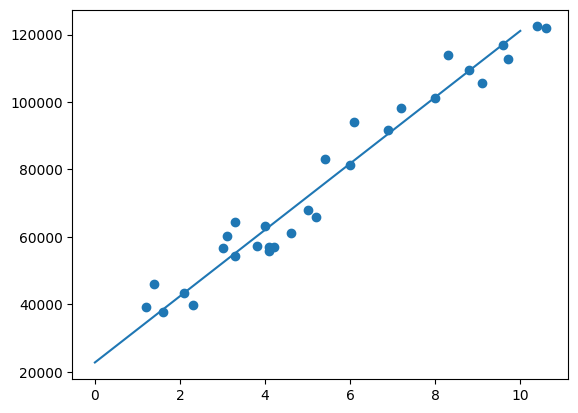

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x_line=np.linspace(0,10)

plt.plot(x_line, b0+b1*x_line)
plt.scatter(x,y)

print(x)
print(y)